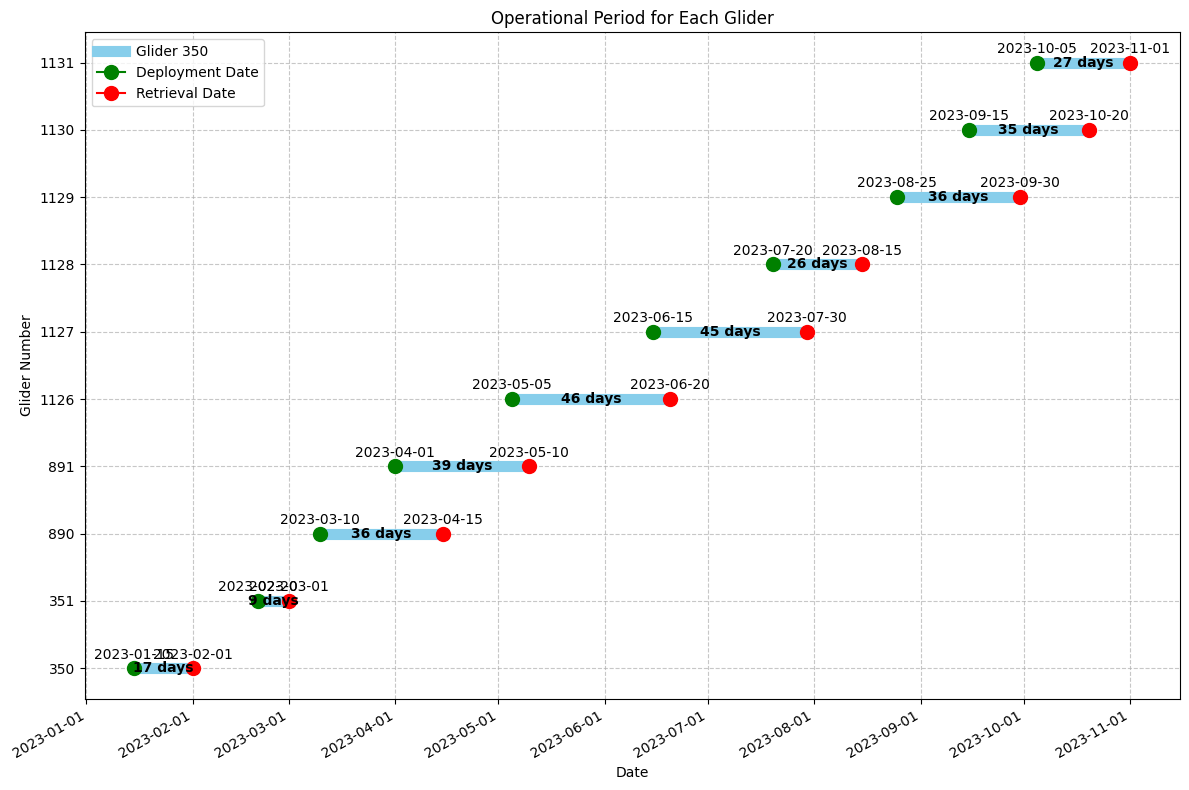

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Sample data (glider number, deployment date, retrieval date)
data = {
    'Glider': [350, 351, 890, 891, 1126, 1127, 1128, 1129, 1130, 1131],
    'Deployment Date': [
        '2023-01-15', '2023-02-20', '2023-03-10', '2023-04-01', '2023-05-05',
        '2023-06-15', '2023-07-20', '2023-08-25', '2023-09-15', '2023-10-05'
    ],
    'Retrieval Date': [
        '2023-02-01', '2023-03-01', '2023-04-15', '2023-05-10', '2023-06-20',
        '2023-07-30', '2023-08-15', '2023-09-30', '2023-10-20', '2023-11-01'
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert date strings to datetime objects
df['Deployment Date'] = pd.to_datetime(df['Deployment Date'])
df['Retrieval Date'] = pd.to_datetime(df['Retrieval Date'])
df['Operational Days'] = (df['Retrieval Date'] - df['Deployment Date']).dt.days

# Set up the plot
plt.figure(figsize=(12, 8))

# Plot horizontal bars with date ranges
for idx, row in df.iterrows():
    plt.plot(
        [row['Deployment Date'], row['Retrieval Date']], 
        [idx, idx],
        marker='o',
        color='skyblue',
        linewidth=8,  # Increased bar width
        label=f'Glider {row["Glider"]}' if idx == 0 else ""
    )
    # Add green dot for deployment date
    plt.plot(
        row['Deployment Date'], 
        idx, 
        marker='o', 
        color='green', 
        markersize=10,  # Size of the dot
        label='Deployment Date' if idx == 0 else ""
    )
    # Add red dot for retrieval date
    plt.plot(
        row['Retrieval Date'], 
        idx, 
        marker='o', 
        color='red', 
        markersize=10,  # Size of the dot
        label='Retrieval Date' if idx == 0 else ""
    )
    # Add operational days text on the bar
    plt.text(
        (row['Deployment Date'] + (row['Retrieval Date'] - row['Deployment Date']) / 2), 
        idx, 
        f'{row["Operational Days"]} days',
        ha='center',
        va='center',
        color='black',
        fontsize=10,
        fontweight='bold'
    )

# Customize x-axis to show date ranges
plt.xlabel('Date')
plt.ylabel('Glider Number')
plt.title('Operational Period for Each Glider')
plt.grid(True, linestyle='--', alpha=0.7)

# Set date format on x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  # Rotate date labels for better readability

# Add annotations for deployment and retrieval dates
for idx, row in df.iterrows():
    plt.text(
        row['Deployment Date'], 
        idx + 0.1, 
        row['Deployment Date'].strftime('%Y-%m-%d'),
        ha='center',
        va='bottom'
    )
    plt.text(
        row['Retrieval Date'], 
        idx + 0.1, 
        row['Retrieval Date'].strftime('%Y-%m-%d'),
        ha='center',
        va='bottom'
    )

# Set y-ticks to glider numbers and remove extra y-axis labels
plt.yticks(range(len(df)), df['Glider'])

# Add a legend to identify the dots
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()